In [ ]:
!pip install tensorflow

In [77]:
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [78]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [79]:
logdir = 'log'

In [80]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))

test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]



In [81]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))






/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [83]:
y_true = test_labels

y_pred = np.argmax(model.predict(test_images), axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [84]:
classes=[0,1,2,3,4,5,6,7,8,9]

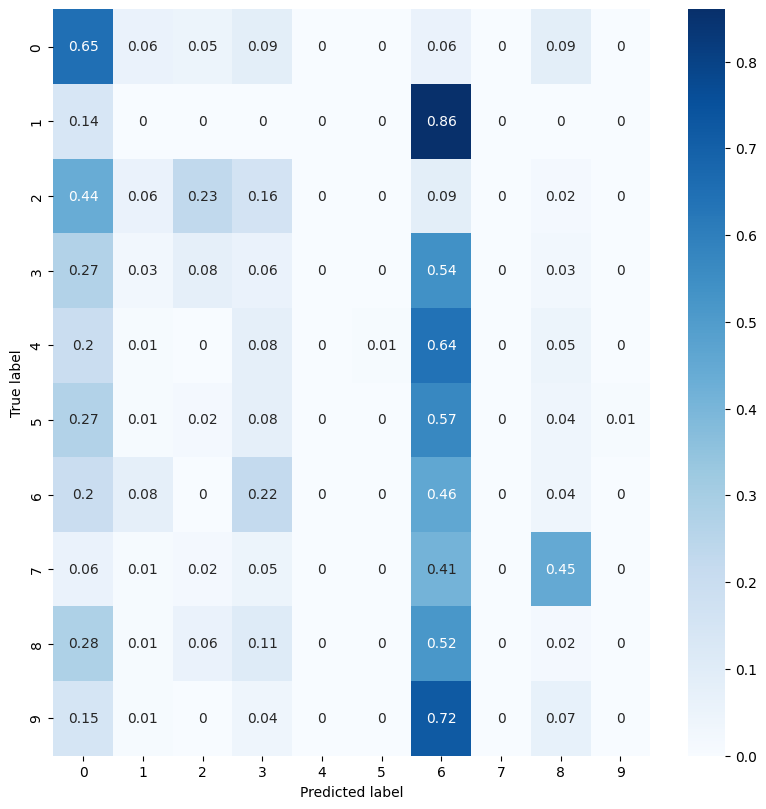

In [86]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions= y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

figure = plt.figure(figsize=(8, 8))

sns.heatmap(con_mat_df, annot=True, cmap = plt.cm.Blues)

plt.tight_layout()

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.show()

In [87]:
def classification_metrics(y_true, y_pred):

    num_classes = len(set(y_true))
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        cm[true, pred] += 1


    accuracy = np.trace(cm) / np.sum(cm)


    precision_per_class = []
    recall_per_class = []
    f1_per_class = []
    specificity_per_class = []

    for i in range(num_classes):
        tp = cm[i, i]
        fn = np.sum(cm[i, :]) - tp
        fp = np.sum(cm[:, i]) - tp
        tn = np.sum(cm) - (tp + fn + fp)

        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        precision_per_class.append(precision)
        recall_per_class.append(recall)
        specificity_per_class.append(specificity)
        f1_per_class.append(f1)

    precision = np.mean(precision_per_class)
    recall = np.mean(recall_per_class)
    specificity = np.mean(specificity_per_class)
    f1 = np.mean(f1_per_class)


    print(f"Acuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Especificity: {specificity:.4f}")
    print(f"F1-score: {f1:.4f}")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1
    }


metrics = classification_metrics(y_true, y_pred)


Acuracy: 0.1383
Precision: 0.0927
Recall: 0.1408
Especificity: 0.9045
F1-score: 0.0896
